# Plot a typical flow-density fundamental diagram

That is, the flow $q$ decreases with increasing density $\rho$ and the flow stops a certain density threshold $R$.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
def use_custom_plot_settings(font_weight="normal"):
    font_size_extra_small = 12
    font_size_small = 16
    font_size_medium = 18
    font_size_big = 20

    plt.style.use("default")
    
    plt.rc("font", size=font_size_small, weight=font_weight)
    plt.rc("axes", titlesize=font_size_big, titleweight=font_weight)
    plt.rc("axes", labelsize=font_size_medium, labelweight=font_weight)
    plt.rc("xtick", labelsize=font_size_small)
    plt.rc("ytick", labelsize=font_size_small)
    plt.rc("legend", fontsize=font_size_extra_small)
    plt.rc("figure", titlesize=font_size_big, titleweight=font_weight)

def use_default_plot_settings():
    plt.rcdefaults()
    
use_custom_plot_settings(font_weight="normal")
print(plt.style.available)

['seaborn-poster', 'seaborn-dark', 'seaborn-colorblind', 'seaborn-notebook', 'seaborn-darkgrid', 'Solarize_Light2', 'grayscale', '_classic_test', 'bmh', 'seaborn-deep', 'tableau-colorblind10', 'fast', 'seaborn', 'seaborn-pastel', 'seaborn-muted', 'seaborn-ticks', 'dark_background', 'seaborn-bright', 'classic', 'seaborn-talk', 'seaborn-white', 'ggplot', 'seaborn-paper', 'seaborn-dark-palette', 'seaborn-whitegrid', 'fivethirtyeight']


In [30]:
def draw_arrow_spines(fig, ax):
    """Remove the frame around the plot and use arrows as x and y axes"""
    
    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)

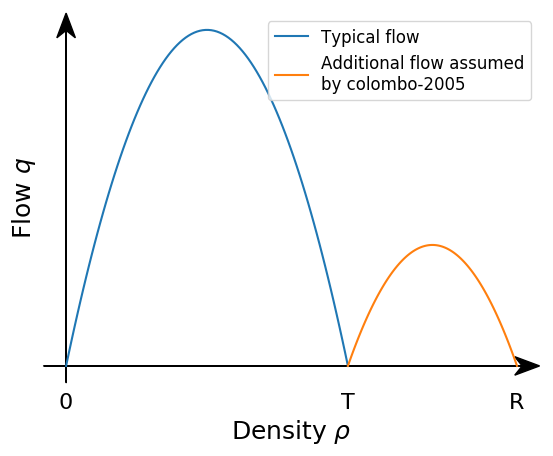

In [31]:
x1 = np.linspace(0, 5, 100)
x2 = np.linspace(5, 8, 100)
y1 = -1 * (x1 - 2.5)**2 + 2.5**2
y2 = -1 * (x2 - 6.5)**2 + 1.5**2

fig, ax = plt.subplots()
ax.plot(x1, y1, label="Typical flow")
ax.plot(x2, y2, label="Additional flow assumed\nby colombo-2005")

draw_arrow_spines(fig, ax)

ax.set_xlabel(r"Density $\rho$")
ax.set_ylabel(r"Flow $q$")

ax.set_xticks([0, 5, 8])
ax.set_xticklabels(["0", "T", "R"])
ax.legend()

fig.savefig("Typical-FlowDensity-Diagram.pdf", bbox_inches="tight", transparent=True)